In [1]:
import pandas as pd
import smote_variants as sv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from Models.funciones import grafica_roc,classification_error
from xgboost import XGBClassifier #esta parcera toca instalarla pip install xgboost
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
import scikitplot as skplt#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
from sklearn.multiclass import OneVsRestClassifier

import time

Según el método wraper la mejor combinación de características es con 8 características, correspondientes
a (0, 1, 2, 3, 4, 6, 7, 8), de acá en adelante se van a hacer 4 modelos de XGBOOST
* 8 características y standar scaler
* 8 características y standar scaler
* 9 características y min max
* 9 características y min max

Todo esto se repite con el One hot encoder

In [2]:
def model_XG(x,y,estimadores, caracteristicas, impresion = False,normalize=False,one_hot=False):
    
    tiempo_i = time.time()
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,3])
    recall_list = np.zeros([4,3])
    f_list = np.zeros([4,3])
    errores = np.zeros(4)
    if(one_hot):
            model = XGBClassifier(n_estimators=estimadores, n_jobs = 0)
            XG = OneVsRestClassifier(model)
    else:
        XG = XGBClassifier(n_estimators=estimadores, n_jobs = 0)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.25) # Modificar metodología de validación

        XG.fit(Xtrain, Ytrain)
        pred = XG.predict(Xtest)

        #code for calculating accuracy
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_

        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_


        errores[j] = classification_error(pred, Ytest)

    if impresion == True:

        skplt.metrics.plot_confusion_matrix(Ytest, pred)
        grafica_roc(model=XG,Xtest=Xtest,Ytest=Ytest)
        
    result={'Eficiencia':np.mean(accuracy_list),'Int_Eficiencia':np.std(accuracy_list),
            'Sensibilidad':np.mean(recall_list),'Int_Sensibilidad':np.std(recall_list),
            'Precisión':np.mean(precision_list),'Int Precisión':np.std(precision_list),
            'F':np.mean(f_list),'Int_F':np.std(f_list),
            'Error':np.mean(errores),'Int_Error':np.std(errores),
            'Tiempo':time.time()-tiempo_i
            }
    return  result

# LABEL ENCODER

In [3]:
df1=pd.read_csv('./CSV ready to model/withoutPCA.csv')
df2=pd.read_csv('./CSV ready to model/withoutPCA_minmax.csv')

In [4]:
le=LabelEncoder()
df1['GRAVEDAD']=df1.loc[:,['GRAVEDAD']].apply(le.fit_transform)
df2['GRAVEDAD']=df2.loc[:,['GRAVEDAD']].apply(le.fit_transform)

In [5]:
y_minmax9=df2['GRAVEDAD']
x_minmax9=df2.drop(['GRAVEDAD','PERIODO'],axis=1)
y_minmax8=df2['GRAVEDAD']
x_minmax8=df2.drop(['GRAVEDAD','PERIODO','COMUNA'],axis=1)

y_standar9=df1['GRAVEDAD']
x_standar9=df1.drop(['GRAVEDAD','PERIODO'],axis=1)
y_standar8=df1['GRAVEDAD']
x_standar8=df1.drop(['GRAVEDAD','PERIODO','COMUNA'],axis=1)

## Min Max scaler

### Min max de 9 características

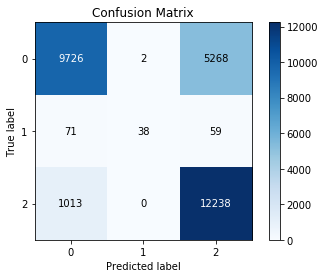

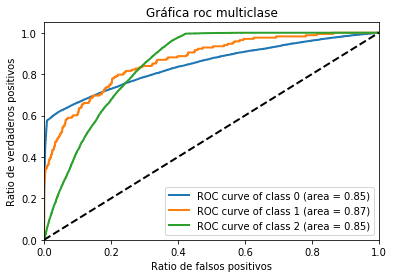

In [6]:
result1 = model_XG(x=x_minmax9,y=y_minmax9,estimadores=100,caracteristicas= 8, impresion = True,normalize=False)

In [7]:
print(result1)

{'Eficiencia': 0.7727872602498681, 'Int_Eficiencia': 0.0012873920533088693, 'Sensibilidad': 0.5894020924463165, 'Int_Sensibilidad': 0.30028030595570965, 'Precisión': 0.8367719909811525, 'Int Precisión': 0.10787549787900523, 'F': 0.6230830339180325, 'Int_F': 0.2139930693927371, 'Error': 0.227212739750132, 'Int_Error': 0.0012873920533088695, 'Tiempo': 23.03829836845398}


### min max de 8 características

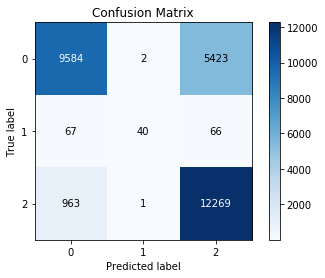

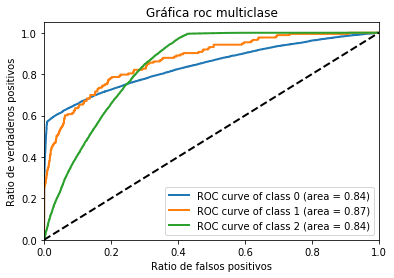

In [8]:
result2 = model_XG(x=x_minmax8,y=y_minmax8,estimadores=100,caracteristicas= 8, impresion = True,normalize=False)

In [9]:
print(result2)

{'Eficiencia': 0.7703677635051909, 'Int_Eficiencia': 0.0021031859256743124, 'Sensibilidad': 0.5867975020285671, 'Int_Sensibilidad': 0.30330863335585645, 'Precisión': 0.8389696592533152, 'Int Precisión': 0.10955049882539285, 'F': 0.6195577903706452, 'Int_F': 0.21412080316446044, 'Error': 0.2296322364948091, 'Int_Error': 0.0021031859256743345, 'Tiempo': 21.006638288497925}


# Standar scaler


### Standar scaler 9 caracterísicas


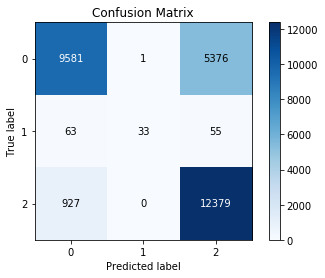

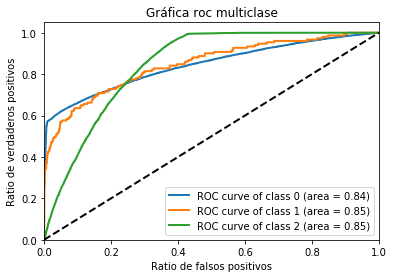

In [10]:
result3 = model_XG(x=x_standar9,y=y_standar9,estimadores=100,caracteristicas= 8, impresion = True,normalize=False)

In [11]:
print(result3)

{'Eficiencia': 0.7735966918880872, 'Int_Eficiencia': 0.0017037355736781799, 'Sensibilidad': 0.5985182231368942, 'Int_Sensibilidad': 0.289970193707857, 'Precisión': 0.8391788777659978, 'Int Precisión': 0.11084504642991305, 'F': 0.6347750596149426, 'Int_F': 0.19667257808087832, 'Error': 0.22640330811191273, 'Int_Error': 0.0017037355736781669, 'Tiempo': 22.993705987930298}


### Standar scaler 8 caracteristicas

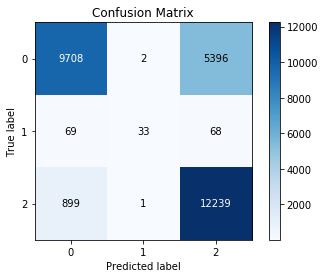

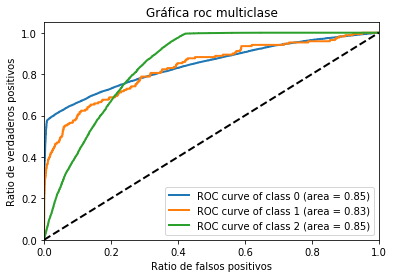

In [12]:
result4 = model_XG(x=x_standar8,y=y_standar8,estimadores=100,caracteristicas= 8, impresion = True,normalize=False)

In [13]:
print(result4)

{'Eficiencia': 0.7720658103114553, 'Int_Eficiencia': 0.001966287653747487, 'Sensibilidad': 0.5836296395699719, 'Int_Sensibilidad': 0.3091810057055135, 'Precisión': 0.835345048200685, 'Int Precisión': 0.10302523697078618, 'F': 0.6146995860311798, 'Int_F': 0.22311520615676692, 'Error': 0.22793418968854479, 'Int_Error': 0.0019662876537474955, 'Tiempo': 21.351314544677734}


# ONE HOT ENCODER

In [14]:
df3=pd.read_csv('./CSV ready to model/withoutPCA.csv')
df4=pd.read_csv('./CSV ready to model/withoutPCA_minmax.csv')

In [15]:
y_minmax9=pd.get_dummies(df4['GRAVEDAD'], prefix='GRAVEDAD')
x_minmax9=df4.drop(['GRAVEDAD','PERIODO'],axis=1)
y_minmax8=pd.get_dummies(df4['GRAVEDAD'], prefix='GRAVEDAD')
x_minmax8=df4.drop(['GRAVEDAD','PERIODO','COMUNA'],axis=1)

y_standar9=pd.get_dummies(df3['GRAVEDAD'], prefix='GRAVEDAD')
x_standar9=df3.drop(['GRAVEDAD','PERIODO'],axis=1)
y_standar8=pd.get_dummies(df3['GRAVEDAD'], prefix='GRAVEDAD')
x_standar8=df3.drop(['GRAVEDAD','PERIODO','COMUNA'],axis=1)

## Min Max scaler

### Min max de 9 características

In [16]:
result5 = model_XG(x=x_minmax9,y=y_minmax9,estimadores=100,caracteristicas= 8, impresion = False,normalize=False,
                   one_hot=True)

/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:


In [17]:
print(result5)

{'Eficiencia': 0.7494105226112968, 'Int_Eficiencia': 0.001181578178018612, 'Sensibilidad': 0.5855773300237412, 'Int_Sensibilidad': 0.30214158834423427, 'Precisión': 0.815164315431097, 'Int Precisión': 0.09302649788535637, 'F': 0.6176566611153222, 'Int_F': 0.2190176041256936, 'Error': 3.5192679922576104e-05, 'Int_Error': 0.0, 'Tiempo': 23.775243997573853}


### Min max de 8 características

In [18]:
result6 = model_XG(x=x_minmax8,y=y_minmax8,estimadores=100,caracteristicas= 8, impresion = False,normalize=False,
                   one_hot=True)

/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:


In [19]:
print(result6)

{'Eficiencia': 0.7492521555516453, 'Int_Eficiencia': 0.0014982743591348312, 'Sensibilidad': 0.5840153214509646, 'Int_Sensibilidad': 0.30513188092276555, 'Precisión': 0.8097973717077617, 'Int Precisión': 0.10093091757352306, 'F': 0.6146337652591684, 'Int_F': 0.2229284219416254, 'Error': 3.5192679922576104e-05, 'Int_Error': 0.0, 'Tiempo': 24.097832679748535}


## Standar scaler

### Standar scaler 9 características

In [20]:
result7 = model_XG(x=x_standar9,y=y_standar9,estimadores=100,caracteristicas= 8, impresion = False,normalize=False,
                   one_hot=True)

/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:


In [21]:
print(result7)

{'Eficiencia': 0.752225937005103, 'Int_Eficiencia': 0.0016830970459613737, 'Sensibilidad': 0.5780517191322435, 'Int_Sensibilidad': 0.3130043013898854, 'Precisión': 0.8197649838816651, 'Int Precisión': 0.09255270420280154, 'F': 0.607768400053065, 'Int_F': 0.2357496456583048, 'Error': 3.5192679922576104e-05, 'Int_Error': 0.0, 'Tiempo': 25.19197154045105}


### Standar scaler 8 características

In [22]:
result8 = model_XG(x=x_standar8,y=y_standar8,estimadores=100,caracteristicas= 8, impresion = False,normalize=False,
                   one_hot=True)

/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:
/home/sht/Documents/Accident-predictor/Models/funciones.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y_e != y_r:


In [23]:
print(result8)

{'Eficiencia': 0.7521379553052965, 'Int_Eficiencia': 0.002890195490781941, 'Sensibilidad': 0.5915576748232793, 'Int_Sensibilidad': 0.2977449817463526, 'Precisión': 0.8320319636351975, 'Int Precisión': 0.0991181207704458, 'F': 0.6257819292746781, 'Int_F': 0.2119496205881024, 'Error': 3.5192679922576104e-05, 'Int_Error': 0.0, 'Tiempo': 25.546547889709473}


## orden
1. Encoder minmax9
2. Encoder minmax8
3. Encoder standar9
4. Encoder standar8
5. OneHot minmax9
6. OneHot minmax8
7. OneHot standar9
8. OneHot standar8

In [25]:
def imprimir_resultados(results,medida):
    for i in range(len(results)):
        print(i+1,results[i][medida])

In [26]:
lista=[result1,result2,result3,result4,result5,result6,result7,result8]

In [27]:
imprimir_resultados(lista,'Eficiencia')

1 0.7727872602498681
2 0.7703677635051909
3 0.7735966918880872
4 0.7720658103114553
5 0.7494105226112968
6 0.7492521555516453
7 0.752225937005103
8 0.7521379553052965


In [28]:
imprimir_resultados(lista,'Precisión')

1 0.8367719909811525
2 0.8389696592533152
3 0.8391788777659978
4 0.835345048200685
5 0.815164315431097
6 0.8097973717077617
7 0.8197649838816651
8 0.8320319636351975


## Resultados preliminares

Con OneHot Encoder no se tuvieron buenos resultados, la mejor eficiencia se obtuvo con el modelo número 3, Encoder standar de características, entonces ninguna de las cosas anteriores por intentar mejorar el modelo funciono, se procede a hacer oversampling.

In [30]:
y=df1['GRAVEDAD']
x=df1.drop(['GRAVEDAD','PERIODO'],axis=1)

# OVERSAMPLING !

Es necesario modificar el método para los modelos para que funcione con el oversampling

In [50]:
def model_XG_Oversamp(x,y,estimadores, caracteristicas, impresion = False,normalize=False,one_hot=False):
    
    tiempo_i = time.time()
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,3])
    recall_list = np.zeros([4,3])
    f_list = np.zeros([4,3])
    errores = np.zeros(4)
    if(one_hot):
            model = XGBClassifier(n_estimators=estimadores, n_jobs = 0)
            XG = OneVsRestClassifier(model)
    else:
        XG = XGBClassifier(n_estimators=estimadores, n_jobs = 0)
    for j in range(4):
        
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y, test_size=0.2) # Modificar metodología de validación
        oversampler= sv.MulticlassOversampling(sv.distance_SMOTE(proportion=0.2))
        x_samp, y_samp= oversampler.sample(Xtrain, Ytrain)
        XG.fit(x_samp, y_samp)
        
        pred = XG.predict(Xtest.values)

        #code for calculating accuracy
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_

        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_


        errores[j] = classification_error(pred, Ytest)

    if impresion == True:

        skplt.metrics.plot_confusion_matrix(Ytest, pred)
        grafica_roc(model=XG,Xtest=Xtest.values,Ytest=Ytest)
        
    result={'Eficiencia':np.mean(accuracy_list),'Int_Eficiencia':np.std(accuracy_list),
            'Sensibilidad':np.mean(recall_list),'Int_Sensibilidad':np.std(recall_list),
            'Precisión':np.mean(precision_list),'Int Precisión':np.std(precision_list),
            'F':np.mean(f_list),'Int_F':np.std(f_list),
            'Error':np.mean(errores),'Int_Error':np.std(errores),
            'Tiempo':time.time()-tiempo_i
            }
    return  result

2020-05-29 12:25:23,786:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2020-05-29 12:25:23,795:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-05-29 12:25:23,800:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-05-29 12:25:31,443:INFO:MulticlassOversampling: Sampling minority class with label: 1
2020-05-29 12:25:31,446:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.497171590194846, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-05-29 12:25:46,524:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2020-05-29 12:25:46,537:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-05-29 12:25:46,553:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs':

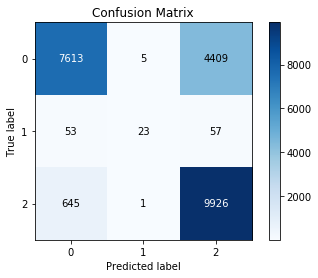

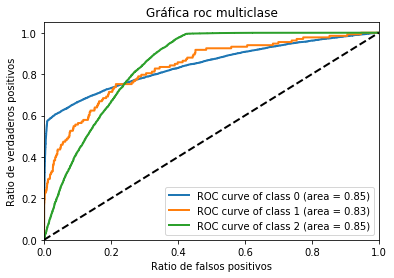

In [53]:
result9=model_XG_Oversamp(x=x,y=y,estimadores=100,caracteristicas= 8, impresion = True,normalize=False)

In [54]:
print(result9)

{'Eficiencia': 0.7709396445539327, 'Int_Eficiencia': 0.0014366228922055235, 'Sensibilidad': 0.5893798971531202, 'Int_Sensibilidad': 0.30306642354835, 'Precisión': 0.8251388758960645, 'Int Precisión': 0.1025726258392202, 'F': 0.6214720644011578, 'Int_F': 0.21207256682623407, 'Error': 0.2290603554460672, 'Int_Error': 0.0014366228922055204, 'Tiempo': 94.76978373527527}


In [55]:
lista=[result1,result2,result3,result4,result5,result6,result7,result8,result9]

In [56]:
imprimir_resultados(lista,'Eficiencia')

1 0.7727872602498681
2 0.7703677635051909
3 0.7735966918880872
4 0.7720658103114553
5 0.7494105226112968
6 0.7492521555516453
7 0.752225937005103
8 0.7521379553052965
9 0.7709396445539327


In [58]:
imprimir_resultados(lista,'Precisión')

1 0.8367719909811525
2 0.8389696592533152
3 0.8391788777659978
4 0.835345048200685
5 0.815164315431097
6 0.8097973717077617
7 0.8197649838816651
8 0.8320319636351975
9 0.8251388758960645
